In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




```
# This is formatted as code
```

Dear Candidate,

As part of the assignment, please use the attached file to prepare a CFO-level dashboard that provides a clear and concise overview of the following:

1.Expenses
2.Sales
3.AP and AR Aging

The dashboard should be designed to enable a CFO to easily analyze the relationship among mentioned parameters.


Once submitted, our HR team will reach out to you.

In [ ]:
import pandas as pd
import random

# Create a sample dataset
data = {
    "Month": pd.date_range(start="2024-01-01", periods=12, freq="M").strftime("%b-%Y"),
    "Expense Category": random.choices(
        ["Operations", "Marketing", "Research", "IT"], k=12
    ),
    "Amount": [random.randint(10000, 50000) for _ in range(12)],
    "Region": random.choices(["North", "South", "East", "West"], k=12),
    "Sales": [random.randint(50000, 150000) for _ in range(12)],
    "Type": random.choices(["AP", "AR"], k=12),
    "Aging Bucket": random.choices(
        ["0-30 days", "31-60 days", "61-90 days", "90+ days"], k=12
    ),
}

# Convert to a DataFrame
df = pd.DataFrame(data)

# Save to an Excel file (optional, for testing)
df.to_excel("mock_data.xlsx", index=False)

# Display the DataFrame
print(df)


<ipython-input-1-bac28638aa3c>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "Month": pd.date_range(start="2024-01-01", periods=12, freq="M").strftime("%b-%Y"),


       Month Expense Category  Amount Region   Sales Type Aging Bucket
0   Jan-2024       Operations   44720   West  137195   AP    0-30 days
1   Feb-2024         Research   11704  North  131445   AR    0-30 days
2   Mar-2024       Operations   33706  North  123755   AR     90+ days
3   Apr-2024       Operations   21467  South  114910   AR   61-90 days
4   May-2024        Marketing   34099   East   74931   AP   61-90 days
5   Jun-2024        Marketing   12430  South   91231   AP   61-90 days
6   Jul-2024        Marketing   38178   East   54226   AR    0-30 days
7   Aug-2024       Operations   26022  South  109205   AR   61-90 days
8   Sep-2024       Operations   41815   West   92278   AP     90+ days
9   Oct-2024         Research   13820  North  143701   AR   31-60 days
10  Nov-2024       Operations   16500  South   81658   AR   31-60 days
11  Dec-2024         Research   28038  South  136332   AR   61-90 days


In [ ]:
import seaborn  as sns
import matplotlib.pyplot as plt

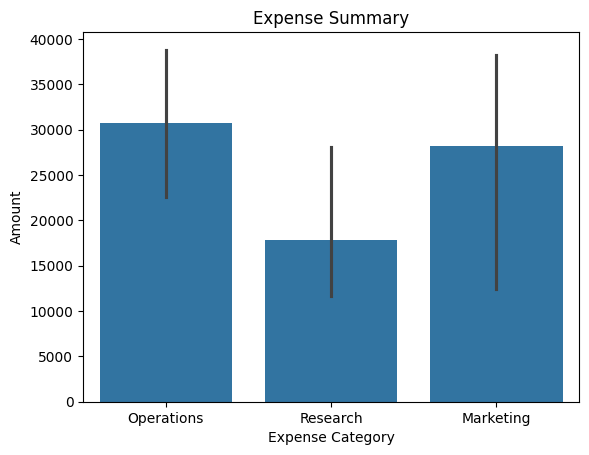

In [ ]:
sns.barplot(x='Expense Category', y='Amount', data=df)
plt.title('Expense Summary')
plt.show()

In [ ]:
direction = df["Region"].unique()
direction

array(['West', 'North', 'South', 'East'], dtype=object)

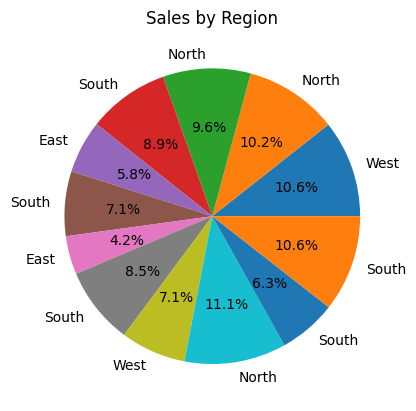

In [ ]:
plt.pie(df['Sales'], labels=df['Region'], autopct='%1.1f%%')
plt.title('Sales by Region')
plt.show()

# pie chart is also good but.. for now
## i will prefer this bar chart for better understanding.


Text(0, 0.5, 'total sales')

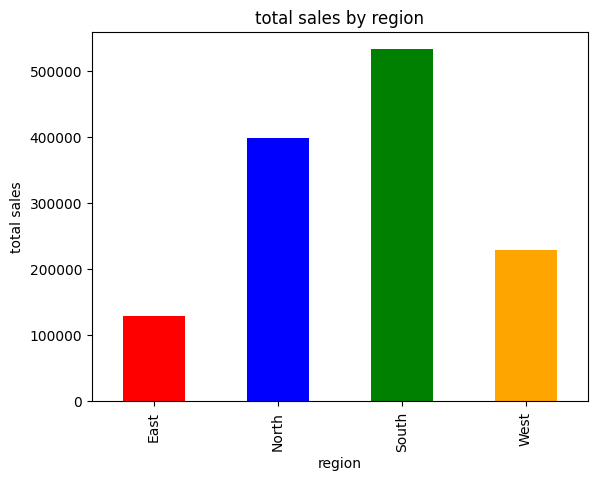

In [ ]:

# i prefer this bar chart for better understanding.
filter_df = df[df["Region"].isin(["north","south","east","west"])]
region_sales = df.groupby("Region")["Sales"].sum()
region_sales.plot(kind="bar",color=["red","blue","green","orange"])
plt.title("total sales by region")
plt.xlabel("region")
plt.ylabel("total sales")

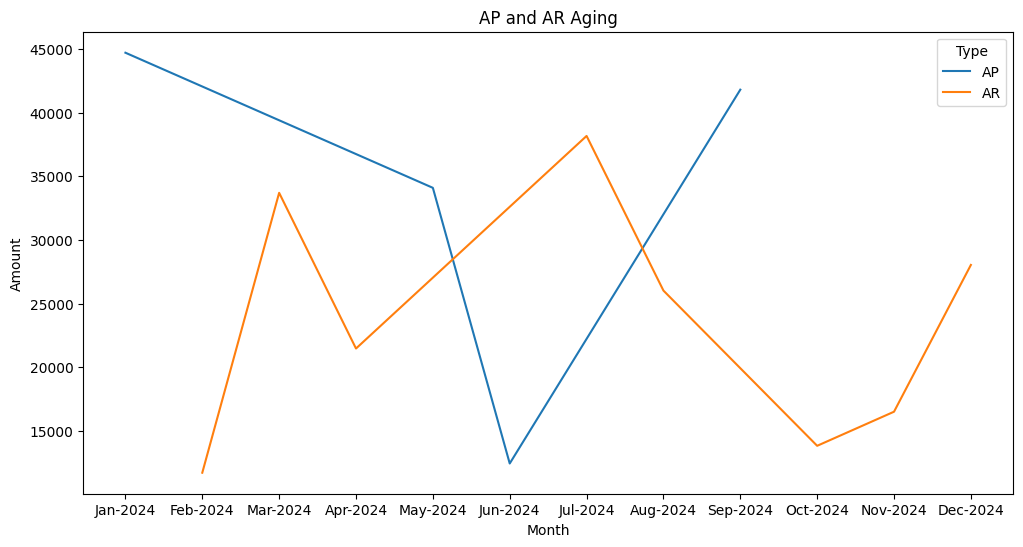

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Month', y='Amount', hue='Type', data=df)
plt.title('AP and AR Aging')
plt.show()

In [ ]:
#Create Dataframe
df = pd.DataFrame(data)

#Group By Expense Category and Caluclate Sum of Amount
grouped_df = df.groupby("Expense Category")["Amount"].sum().reset_index()

print(grouped_df)

  Expense Category  Amount
0               IT   39719
1        Marketing   67431
2       Operations  125085
3         Research   95907


In [ ]:
# Group by Expense Category
expense_summary = df.groupby("Expense Category")["Amount"].sum().reset_index()

# Display summary
print("Expense Summary:")
print(expense_summary)


Expense Summary:
  Expense Category  Amount
0               IT   39719
1        Marketing   67431
2       Operations  125085
3         Research   95907


In [ ]:
# Group by Region
sales_summary = df.groupby("Region")["Sales"].sum().reset_index()

# Display summary
print("Sales Summary:")
print(sales_summary)


Sales Summary:
  Region   Sales
0   East  291805
1  North  730381
2   West  193373


In [3]:
# Install required libraries
!pip install dash pandas plotly flask-ngrok

# Import libraries
import pandas as pd
import plotly.express as px
from dash import Dash, dcc, html
from dash.dependencies import Input, Output
from flask_ngrok import run_with_ngrok

# Data Preparation
# Replace this data with your provided data or load it from a file.
expense_data = pd.DataFrame({
    "Expense Category": ["IT", "Marketing", "Operations", "Research"],
    "Amount": [95380, 143776, 121405, 71762]
})

sales_data = pd.DataFrame({
    "Region": ["East", "North", "South", "West"],
    "Sales": [439632, 294082, 215759, 102866]
})

ap_ar_data = pd.DataFrame({
    "Category": ["AP Due", "AR Due", "AP Past Due", "AR Past Due"],
    "Amount": [80000, 90000, 50000, 40000]
})

# Initialize the Dash app
app = Dash(__name__)
run_with_ngrok(app.server)  # Integrate ngrok for external access

# Layout of the dashboard
app.layout = html.Div([
    html.H1("CFO Dashboard", style={"textAlign": "center"}),

    # Row 1: Expenses and Sales Summary
    html.Div([
        html.Div([
            html.H3("Expense Summary"),
            dcc.Graph(
                id="expense-chart",
                figure=px.bar(expense_data,
                              x="Expense Category",
                              y="Amount",
                              title="Expense Summary",
                              color="Expense Category",
                              text="Amount")
            )
        ], style={"width": "48%", "display": "inline-block"}),

        html.Div([
            html.H3("Sales Summary"),
            dcc.Graph(
                id="sales-chart",
                figure=px.pie(sales_data,
                              names="Region",
                              values="Sales",
                              title="Sales by Region",
                              hole=0.4)
            )
        ], style={"width": "48%", "display": "inline-block"}),
    ]),

    # Row 2: AP and AR Aging Summary
    html.Div([
        html.H3("AP and AR Aging Summary"),
        dcc.Graph(
            id="ap-ar-chart",
            figure=px.bar(ap_ar_data,
                          x="Category",
                          y="Amount",
                          title="AP and AR Aging",
                          color="Category",
                          text="Amount")
        )
    ]),
])

# Run the app
app.run_server()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 14.7 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


<IPython.core.display.Javascript object>